<a href="https://colab.research.google.com/github/frukkurt/OCR_PTVN/blob/main/DEMO_CascadeTabNet_OCR_to_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CascadeTabNet Demo Notebook
[![PWC](https://img.shields.io/endpoint.svg?url=https://paperswithcode.com/badge/cascadetabnet-an-approach-for-end-to-end/table-detection-on-icdar2013-1)](https://paperswithcode.com/sota/table-detection-on-icdar2013-1?p=cascadetabnet-an-approach-for-end-to-end)
[![PWC](https://img.shields.io/badge/PyTorch-v1.4-blue)](https://pytorch.org/)
[![PWC](https://img.shields.io/badge/%20mmdetection%20-v1.2-blue)](https://github.com/open-mmlab/mmdetection)

> **CascadeTabNet: An approach for end to end table detection and structure recognition from image-based documents**<br>
> [Devashish Prasad](https://github.com/DevashishPrasad),
> [Ayan Gadpal](https://github.com/ayangadpal),
> [Kshitij Kapadni](https://github.com/kshitijkapadni),
> [Manish Visave](https://github.com/ManishDV),
> <br>
> [Preprint Link of Paper](https://arxiv.org/abs/2004.12629)<br>
> <a href="results.pdf">Supplementary file</a> <br>
> The paper has been accepted at [CVPR 2020 Workshop on Text and Documents in the Deep Learning Era](https://cvpr2020text.wordpress.com/)<br>
> [Code Link](https://github.com/DevashishPrasad/CascadeTabNet)
<img align="right" src="https://github.com/frukkurt/OCR_PTVN/blob/main/imgs/CVPR%20Teaser.gif?raw=1" />

## 1. Install all the prerequisite
This will take a while, Remember to **Restart Runtime** after this step is done 

In [ ]:
!sudo apt install tesseract-ocr

!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,798 kB/s)
debconf: unable to initi

In [ ]:
!sudo apt-get install tesseract-ocr-eng  #for english
!sudo apt-get install tesseract-ocr-tam  #for tamil
!sudo apt-get install tesseract-ocr-deu  #for deutsch (German)
!sudo apt-get install tesseract-ocr-tha  #for deutsch (thai)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-eng is already the newest version (4.00~git24-0e00fe6-1.2).
tesseract-ocr-eng set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tesseract-ocr-tam
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 1,070 kB of archives.
After this operation, 3,253 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-tam all 4.00~git24-0e00fe6-1.2 [1,07

In [ ]:

!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r {"requirements.txt"}
!pip install pillow==6.2.1 
!pip install mmcv==0.4.3
%cd "/content"

In [ ]:
import os

def restart_runtime():

  os.kill(os.getpid(), 9)

  if ('Tesla P100-PCIE...' in GPU_model):

    print("You are good to go")

  else:print("Changing GPU")

restart_runtime()

## 2. Clone the Repository 
We will be using "ICDAR 19 (Track B2 Modern) table structure recognition" for demo

In [ ]:
!git clone https://github.com/DevashishPrasad/CascadeTabNet.git

Cloning into 'CascadeTabNet'...
remote: Enumerating objects: 675, done.
remote: Total 675 (delta 0), reused 0 (delta 0), pack-reused 675
Receiving objects: 100% (675/675), 16.55 MiB | 18.90 MiB/s, done.
Resolving deltas: 100% (328/328), done.


## 3. Download the Pretrained Model



In [ ]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/epoch_36.pth
100% 664M/664M [00:02<00:00, 278MB/s]


## 4. Run the Predictions

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


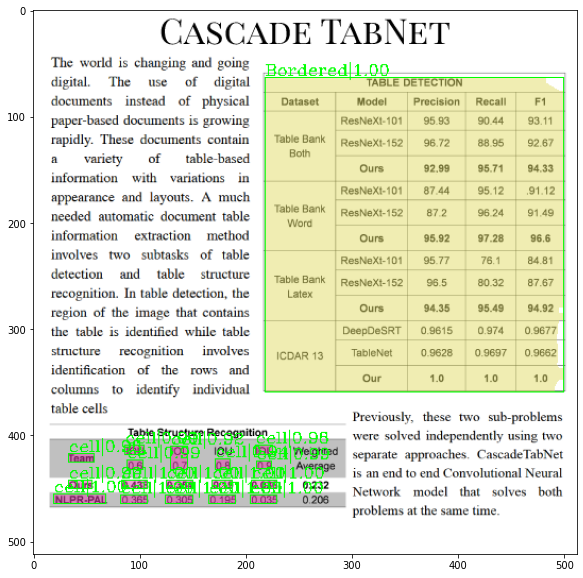

In [ ]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot,show_result
import mmcv
# Load model
config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Test a single image 
img = "/content/CascadeTabNet/Demo/demo.png"

# Run Inference
result = inference_detector(model, img)

# Visualization results
show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=0.9)






In [ ]:
bbox_result, segm_result = result

In [ ]:
bbox_result

[array([[218.06601   ,  63.345993  , 499.1235    , 359.6285    ,
           0.99998415]], dtype=float32),
 array([[1.24599945e+02, 4.56096252e+02, 1.50044250e+02, 4.64240143e+02,
         9.97700274e-01],
        [8.29217834e+01, 4.56154999e+02, 1.07782349e+02, 4.64239532e+02,
         9.97802198e-01],
        [1.25117943e+02, 4.42158661e+02, 1.50015030e+02, 4.50610229e+02,
         9.98308182e-01],
        [1.98071747e+01, 4.55575317e+02, 6.80631638e+01, 4.64789917e+02,
         9.95660484e-01],
        [1.65513000e+02, 4.56115021e+02, 1.90672577e+02, 4.64388947e+02,
         9.97229517e-01],
        [8.31979599e+01, 4.42330017e+02, 1.07749634e+02, 4.50538452e+02,
         9.98061597e-01],
        [3.32863808e+01, 4.42888977e+02, 5.55910492e+01, 4.50813660e+02,
         9.86473918e-01],
        [8.67470474e+01, 4.09841370e+02, 1.04103867e+02, 4.18636505e+02,
         9.90532637e-01],
        [2.04940979e+02, 4.56185333e+02, 2.29674881e+02, 4.64251831e+02,
         9.96962607e-01],
   

In [ ]:
import numpy as np
bboxes = np.vstack(bbox_result)
bboxes

array([[2.18066010e+02, 6.33459930e+01, 4.99123505e+02, 3.59628510e+02,
        9.99984145e-01],
       [1.24599945e+02, 4.56096252e+02, 1.50044250e+02, 4.64240143e+02,
        9.97700274e-01],
       [8.29217834e+01, 4.56154999e+02, 1.07782349e+02, 4.64239532e+02,
        9.97802198e-01],
       [1.25117943e+02, 4.42158661e+02, 1.50015030e+02, 4.50610229e+02,
        9.98308182e-01],
       [1.98071747e+01, 4.55575317e+02, 6.80631638e+01, 4.64789917e+02,
        9.95660484e-01],
       [1.65513000e+02, 4.56115021e+02, 1.90672577e+02, 4.64388947e+02,
        9.97229517e-01],
       [8.31979599e+01, 4.42330017e+02, 1.07749634e+02, 4.50538452e+02,
        9.98061597e-01],
       [3.32863808e+01, 4.42888977e+02, 5.55910492e+01, 4.50813660e+02,
        9.86473918e-01],
       [8.67470474e+01, 4.09841370e+02, 1.04103867e+02, 4.18636505e+02,
        9.90532637e-01],
       [2.04940979e+02, 4.56185333e+02, 2.29674881e+02, 4.64251831e+02,
        9.96962607e-01],
       [1.68980927e+02, 4.4221

In [ ]:
labels = [np.full(bbox.shape[0], i, dtype=np.int32)for i, bbox in enumerate(bbox_result)]
labels

[array([0], dtype=int32),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1], dtype=int32),
 array([2], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([], dtype=int32),
 array([

In [ ]:
labels = np.concatenate(labels)

In [ ]:
labels

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [ ]:
def model_test(img,score_thr,show_img=True):
  # Load model
  config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
  checkpoint_file = '/content/epoch_36.pth'
  model = init_detector(config_file, checkpoint_file, device='cuda:0')
  result = inference_detector(model, img)


  
  if show_img==True:
    img_output=show_result_pyplot(img, result,('Bordered', 'cell', 'Borderless'), score_thr=score_thr)
  else:
    pass

  filter_output=list(filter(lambda c: len(c)>0, result[0]))

  return filter_output

**Note :** If you are getting "no module name mmdet" error, Please Restart the runtime by pressing "Crtl+M" OR going to the runtime (5th option, top left) and selecting Restart Runtime.

After this, use TSR postprocessing for best result

# 5.TEST OWN IMG

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1fwt5vfoOJgu0f1RFDJ1Hr7Mnz48f9s6O?usp=sharing

Retrieving folder list
Processing file 1HSWx9eBOpxRCvmoiuXESlplggX0LwgVu test_img1.png
Processing file 1tvVv9WngDuIj0lUPFX1FMvqhUSCys_PH test_img2.png
Processing file 1bsymrtqm2anTWQoWebSpXVBT-FDfG_Cs test_img3.png
Processing file 1d5iK7CTMSnXFj_4xWlRowc4Ck_0M9K5O test_img4.png
Processing file 1U-Kj77LaxEOspUUIzBYpZ6syvqkgXBo5 test_img5.png
Processing file 1plbRWgvuG0icFcHfu5WRBhh9OUpxqtxR test_img6.png
Processing file 1vvF5_6bl4rOZEGT6MK5pvC8IdqR06yNr test_img7.png
Processing file 19UX8iOB9e0ZbVrsFzyENqrog7DdC7rLw test_img8.png
Processing file 1J94_dgMLGFb1p1oqS_Kn7ag96eWTmKbN test_img9.png
Processing file 1v2m2GaD-J-pBQbhqXzWNSyjtjH-yAc6l test_img10.jpg
Processing file 1ycqjntC9t44O3A9qqUuAbV5uOUGHZruw test_img11.png
Processing file 1g843O8-o3Nr-A_Lab2q5n7-DsJbcFMYc test_img12.jpg
Processing file 1-xmkGsVw9IgsMTdwjol_mAdv0PFpqbaP test_img13.jpg
Processing file 1Mjway-C_Eyr5BL0yGnO8vtj4xjYphNur test_img14.jpg
Processing file 14Cbr9x7RZeNfcmR_5_4xEDqQWodM_aTO test_img16.png
Retrieving 

test_img6.png


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


test_img1.png
test_img2.png
test_img9.png
test_img5.png
test_img16.png
test_img4.png
test_img13.jpg
test_img10.jpg
test_img3.png
test_img11.png


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/content/mmdetection/mmdet/apis/inference.py:206: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=fig_size)


test_img14.jpg
test_img7.png
test_img12.jpg
test_img8.png


<Figure size 1080x1080 with 0 Axes>

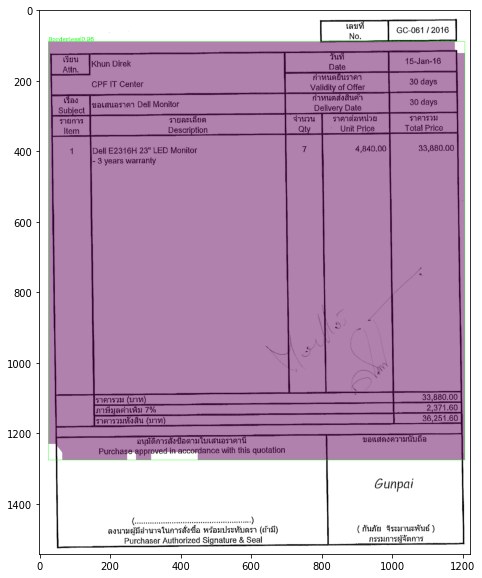

<Figure size 1080x1080 with 0 Axes>

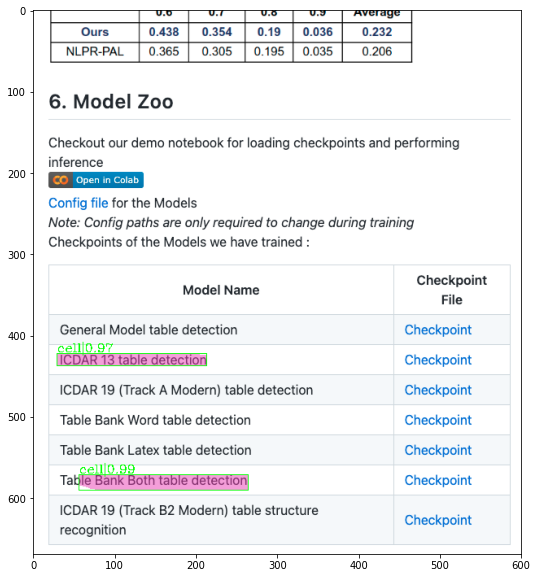

<Figure size 1080x1080 with 0 Axes>

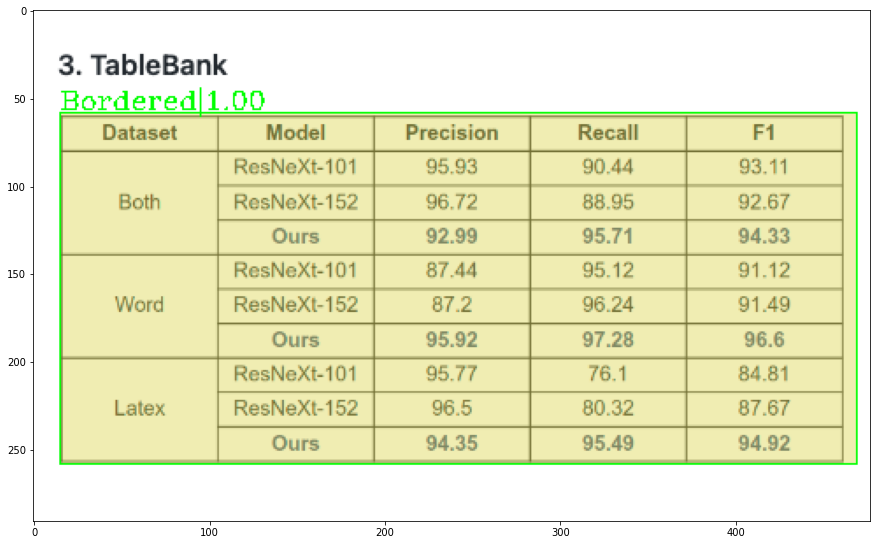

<Figure size 1080x1080 with 0 Axes>

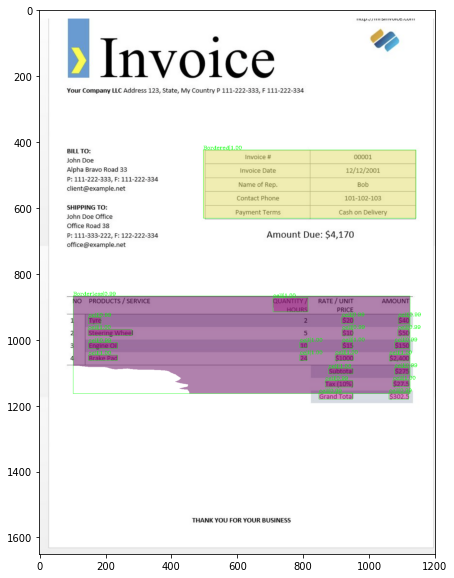

<Figure size 1080x1080 with 0 Axes>

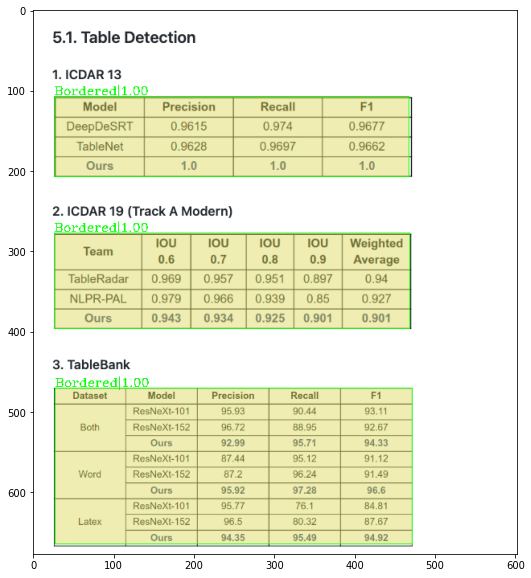

<Figure size 1080x1080 with 0 Axes>

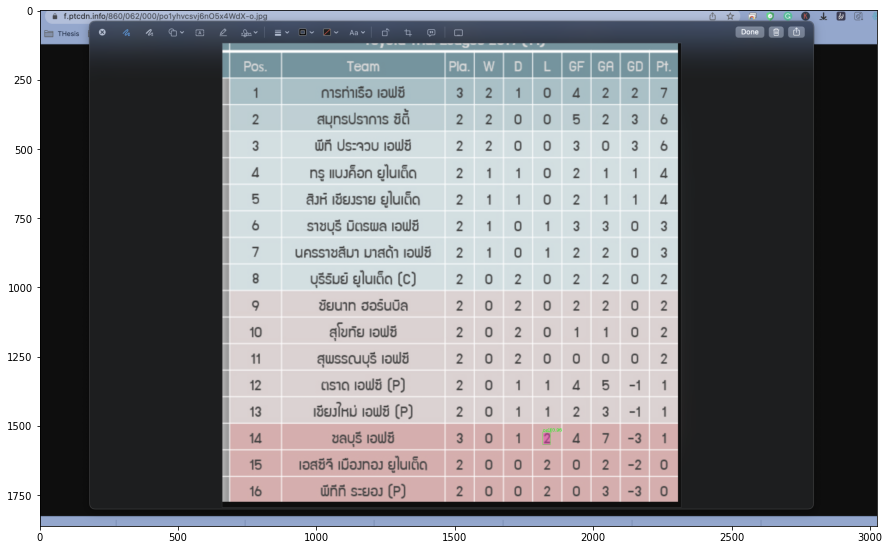

<Figure size 1080x1080 with 0 Axes>

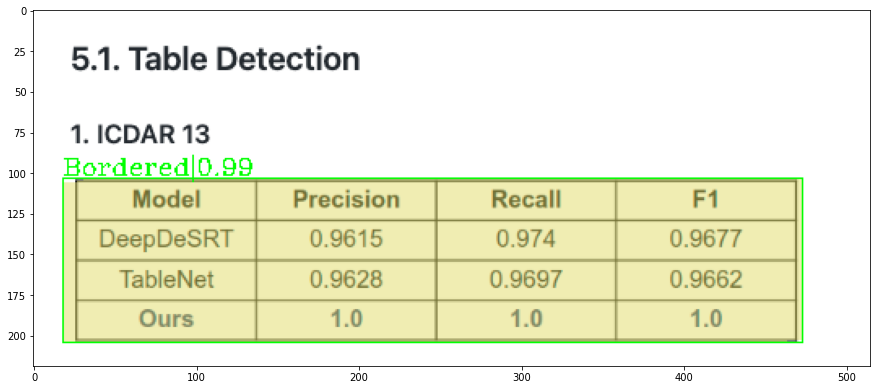

<Figure size 1080x1080 with 0 Axes>

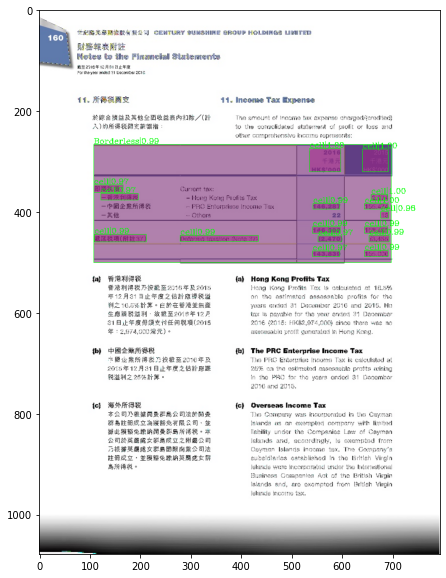

<Figure size 1080x1080 with 0 Axes>

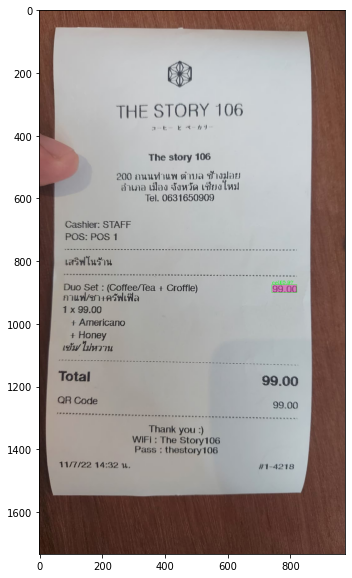

<Figure size 1080x1080 with 0 Axes>

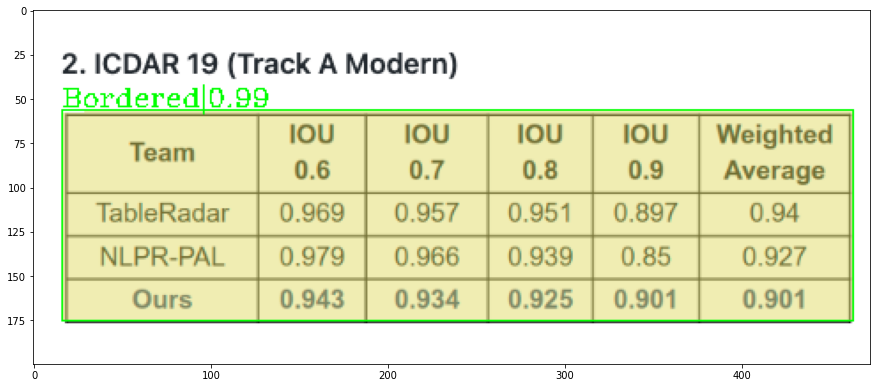

<Figure size 1080x1080 with 0 Axes>

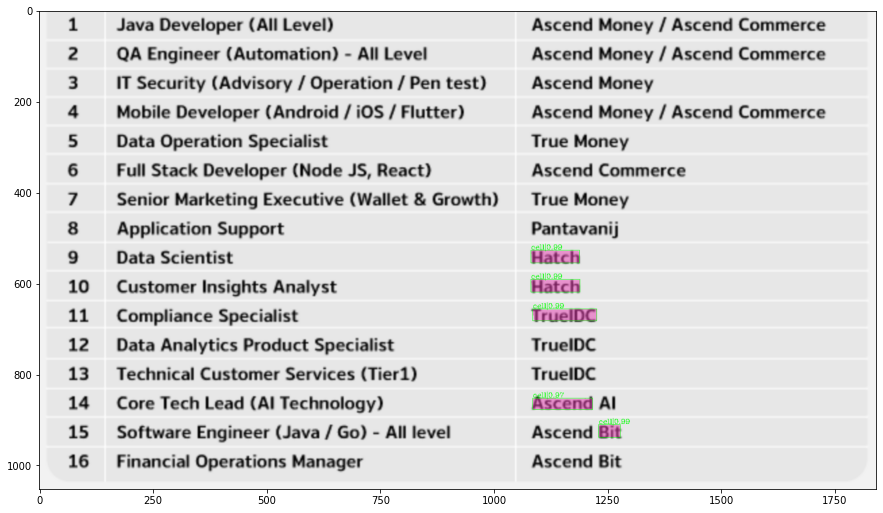

<Figure size 1080x1080 with 0 Axes>

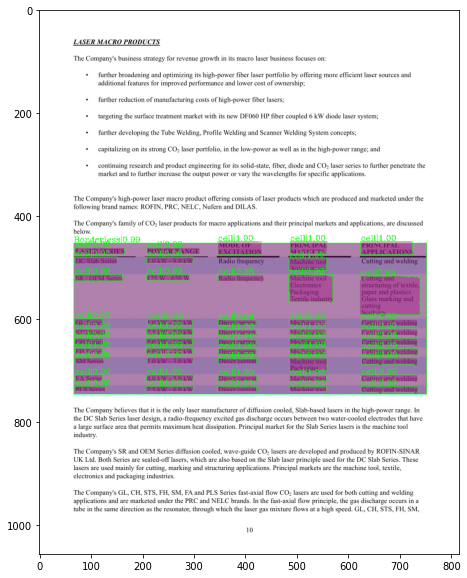

<Figure size 1080x1080 with 0 Axes>

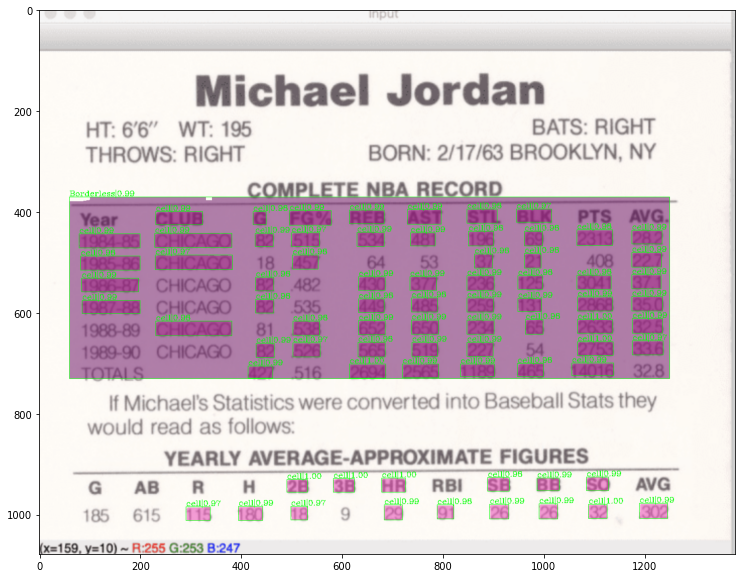

<Figure size 1080x1080 with 0 Axes>

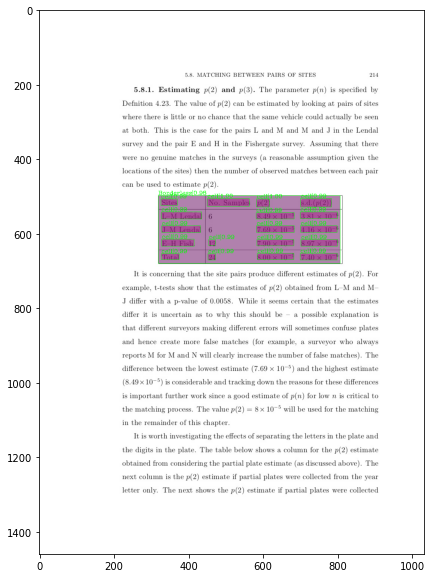

<Figure size 1080x1080 with 0 Axes>

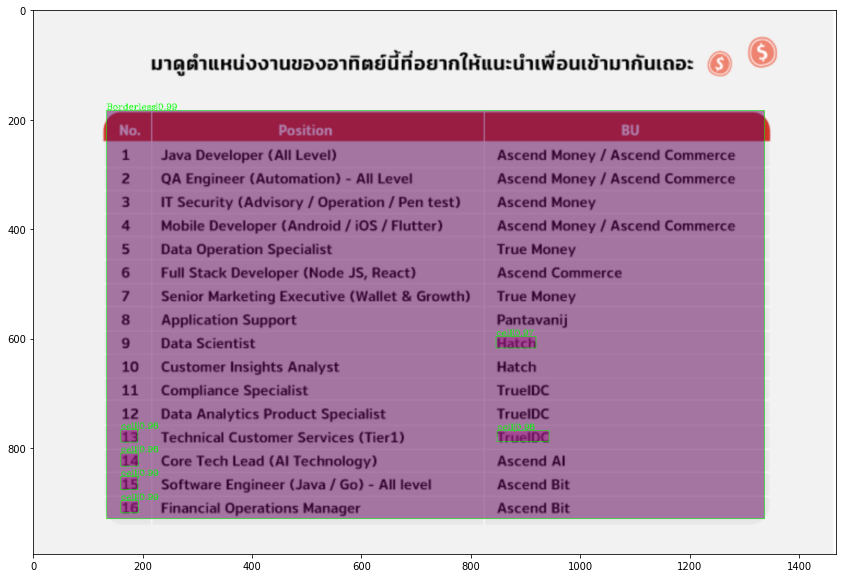

In [ ]:
import os
import matplotlib.pyplot as plt
path_folder="/content/test_img/"
lisdr=os.listdir(path_folder)

for i in lisdr:
  print(i)
  plt.figure(figsize=(15,15))
  img=path_folder+i

  res=model_test(img,0.97,show_img=True)


In [ ]:
!gdown --folder "https://drive.google.com/drive/folders/1wz4o3qM7-FJwsXiMjqIJcOp287aiRzGm"

Retrieving folder list
Processing file 1cxYSgcbLyOE29_qDvKuPZDSmbR9EQu8o img1.png
Processing file 1I0wFMqi5oYyIQO6jd9UHfcQ2_oEuDt1r img2.png
Processing file 19t22eWIjvdHzEmMyaZa48H8vzXfjqOKI img3.png
Processing file 1J3GomV7_Ykzf6xdX4MD6UwgoS22sWWuJ img4.png
Processing file 1TwO77FV4Qe4jw2nurykyzmCVJU4G1qJf img5.png
Processing file 14LJrMoN39Msw0YH_UqS0BqGPPO63Jwv8 img6.png
Processing file 1gvUwHfG8KhmZT3bzenxrtlDDpXp3TVYV img7.png
Processing file 1e8qCrTY6FrzXvBJocIse6iPzjvT84C4Z img8.png
Processing file 1a9-vb0YxqyQ0tIPw7KVZvC_uVqF2cxjC img9.png
Processing file 1_m1wG1cUrrmXqLQjpTsKTk6dkRR3Czx3 img10.png
Processing file 18lFXzQI7Bk_ZQXjdIKHIbULXpHkSNjEe img11.png
Processing file 1kh-pFNGwKNHqaRSVR4XCa5xzjaXp_G_Q img12.png
Processing file 1p05OSSYyId6PYazRr71sJdg4RlRkLLAC img13.png
Processing file 1suZOuof6h_BhOm9bD1kq3-R9qcOgpjQn img14.png
Processing file 1VFW44xOdn4-rUwg8DxRm9QCZGmVROSEO img15.png
Processing file 1BWwlBl9HGZh1_f87M_uOcqyQUFf6nwAB img16.png
Processing file 1wvPB_00xN

img3.png


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


.ipynb_checkpoints
img14.png
img19.png
img5.png
img4.png
img2.png
img8.png
img6.png
img20.png
img11.png
img10.png
img22.png
img1.png
img17.png
img7.png
img13.png
img16.png
img15.png
img21.png
img12.png
img18.png
img9.png


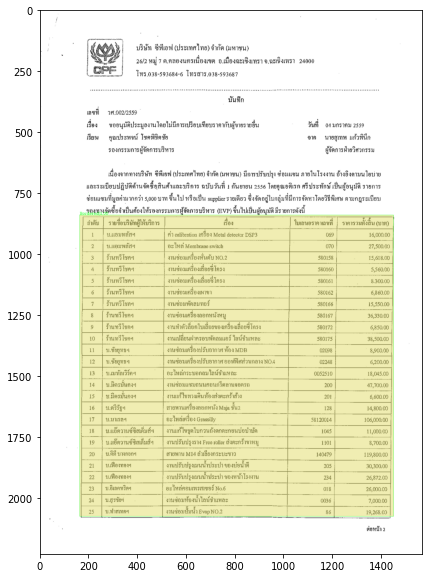

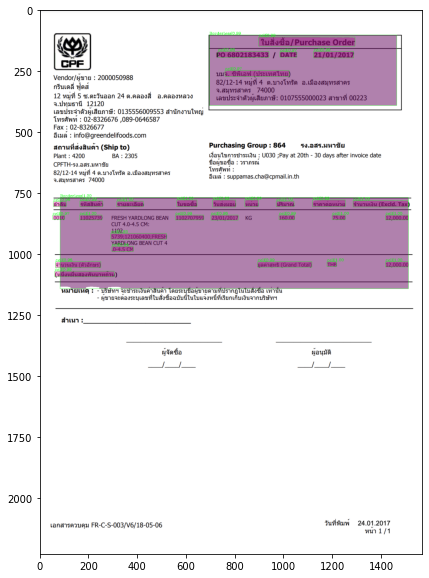

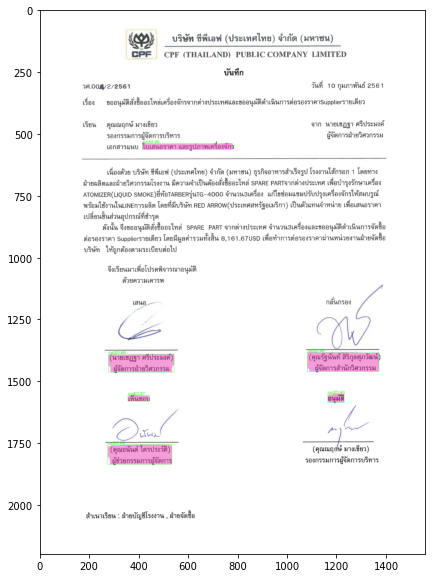

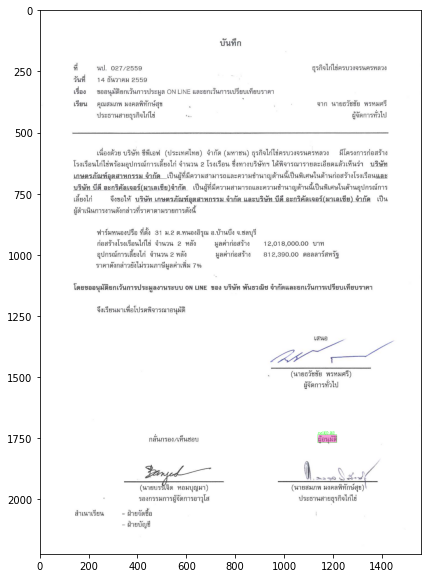

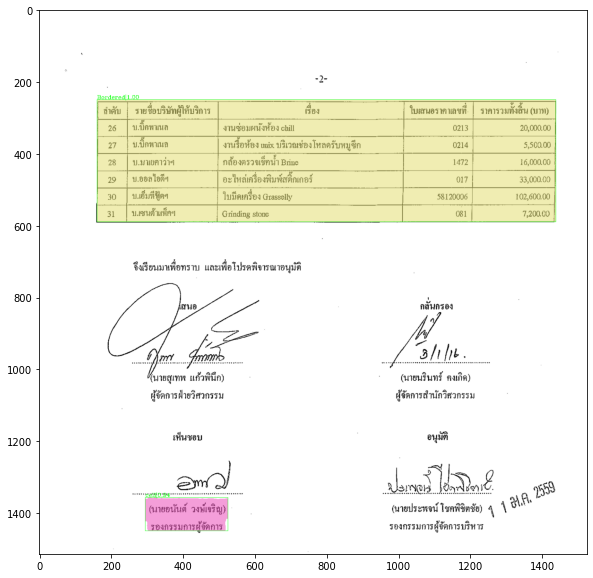

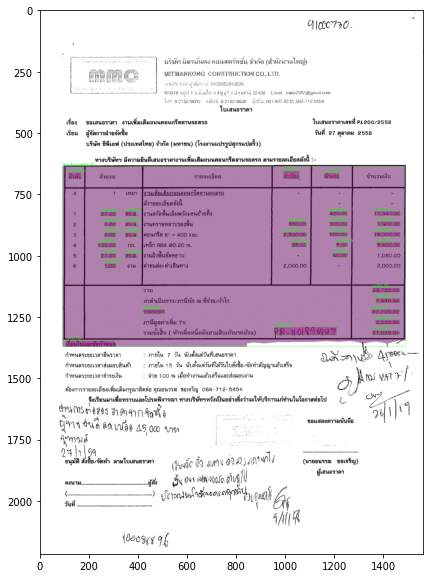

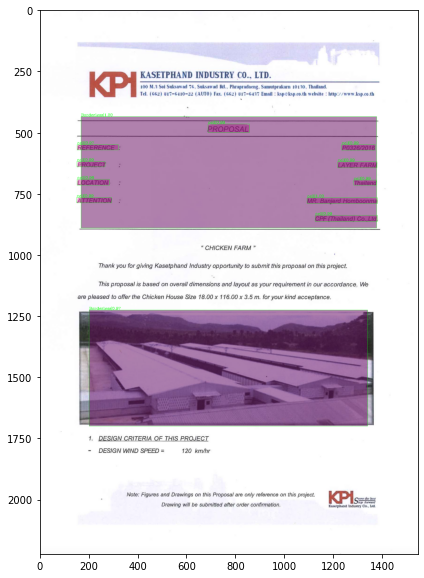

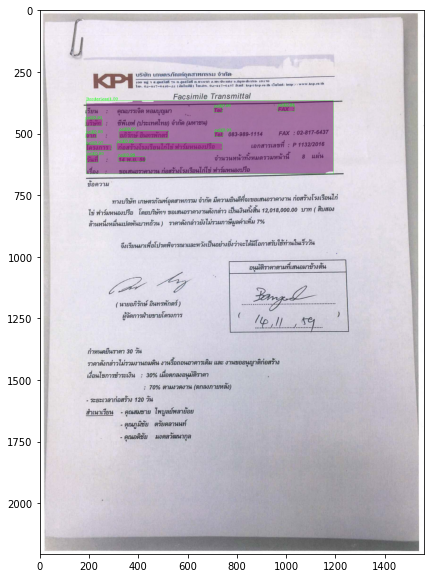

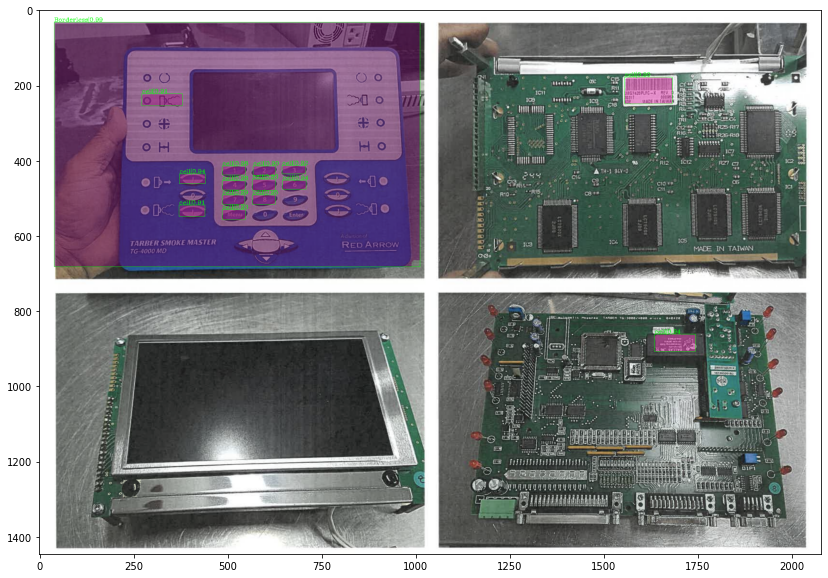

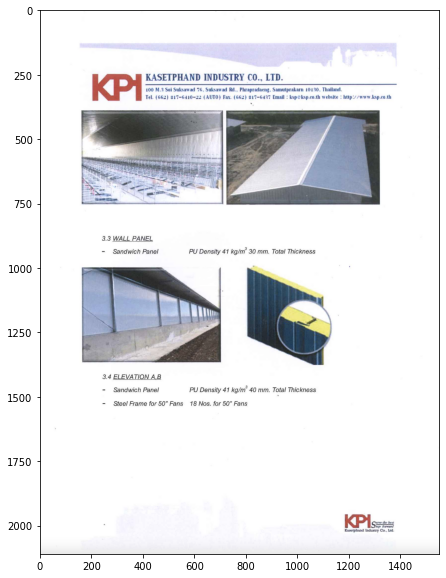

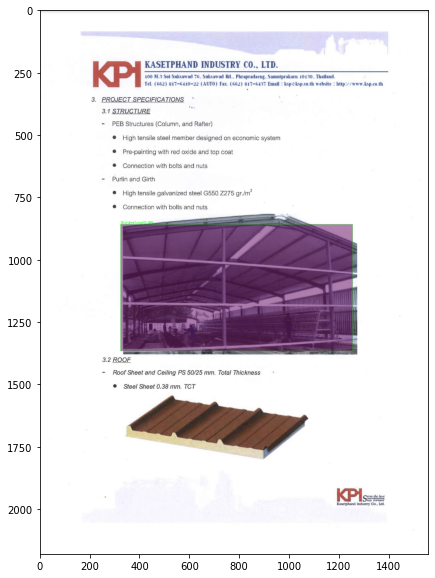

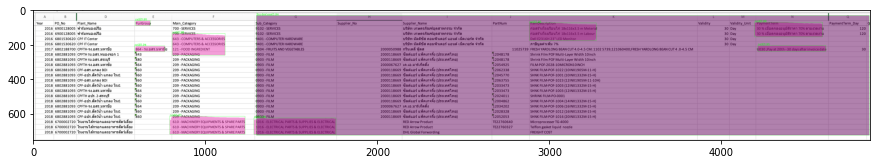

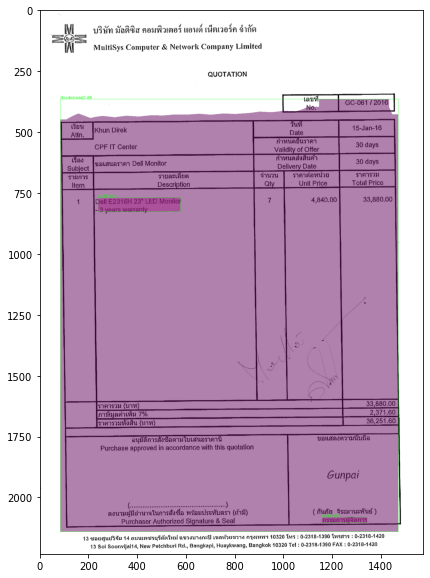

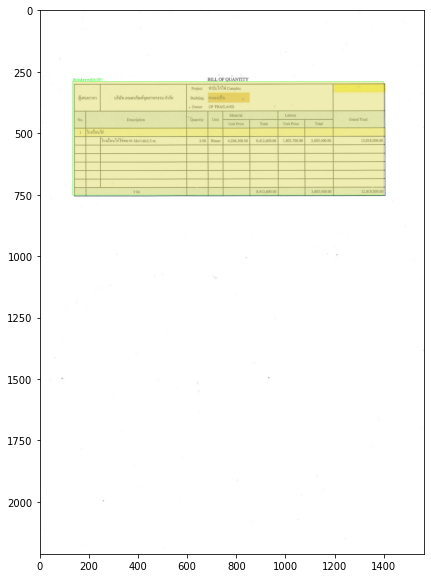

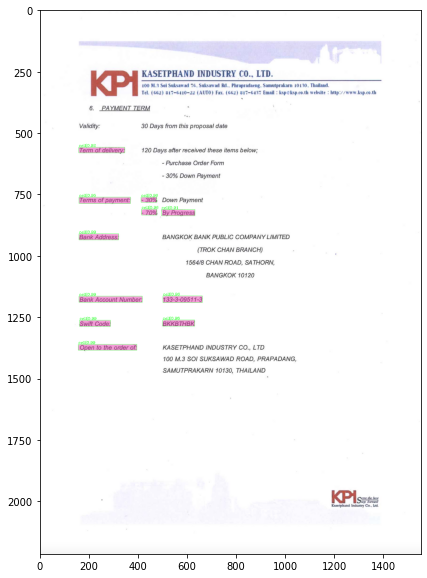

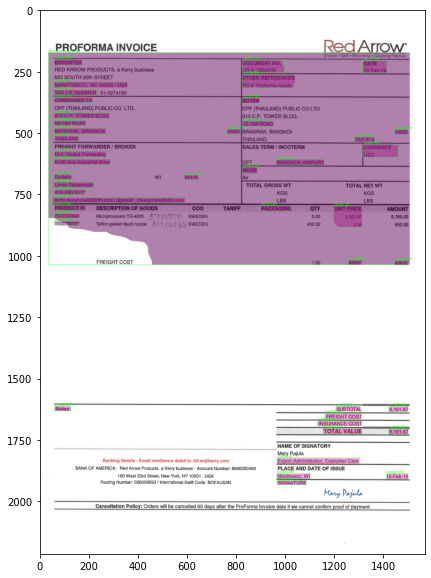

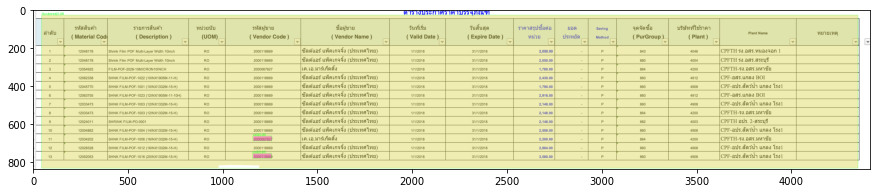

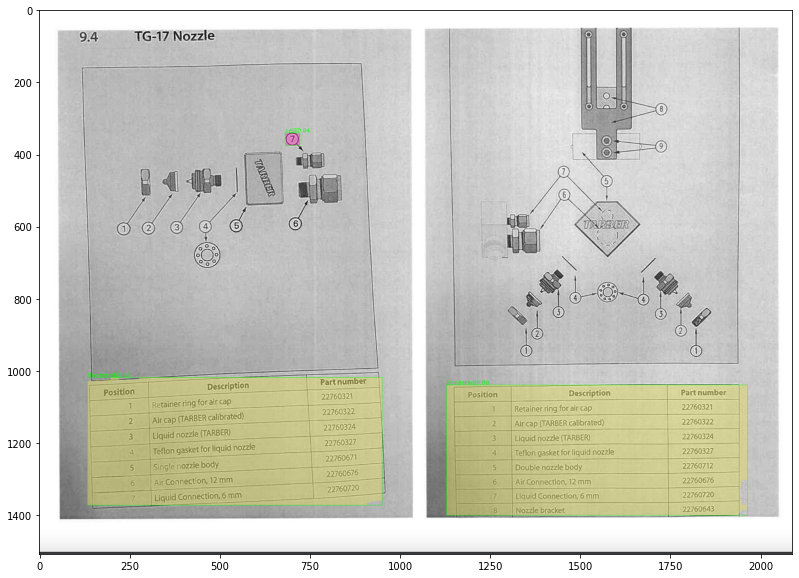

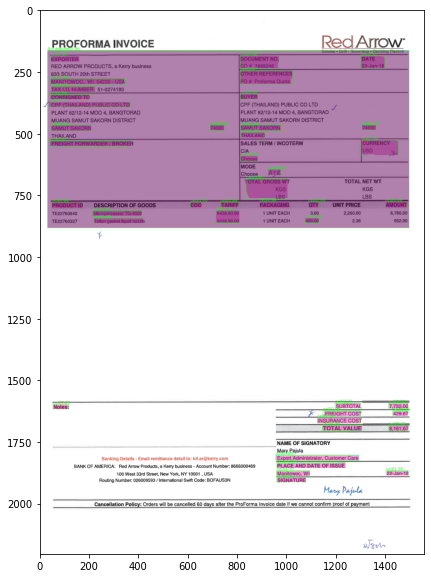

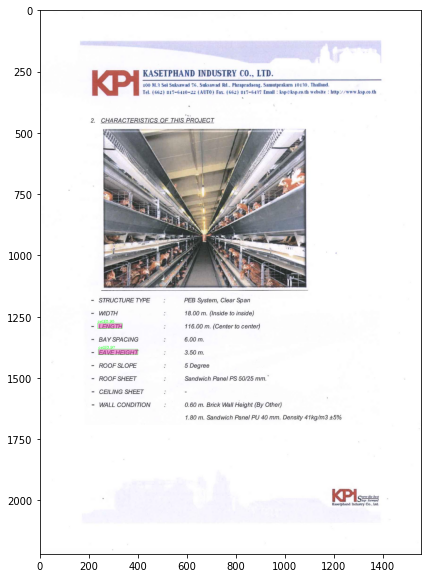

In [ ]:
path_folder="/content/DEMO_BOQ/"
lisdr=os.listdir(path_folder)

for i in lisdr:
  try:
    print(i)
    img=path_folder+i

    res=model_test(img,0.90,show_img=True)
  except:
    pass

    

# Cite us
If you find this work useful for your research, please cite our paper:

```
@misc{ cascadetabnet2020,
    title={CascadeTabNet: An approach for end to end table detection and structure recognition from image-based documents},
    author={Devashish Prasad and Ayan Gadpal and Kshitij Kapadni and Manish Visave and Kavita Sultanpure},
    year={2020},
    eprint={2004.12629},
    archivePrefix={arXiv},
    primaryClass={cs.CV}
}
```


In [ ]:
print("OK")

OK


# DEMO

In [ ]:
# from google.colab import files

# uploaded = files.upload()

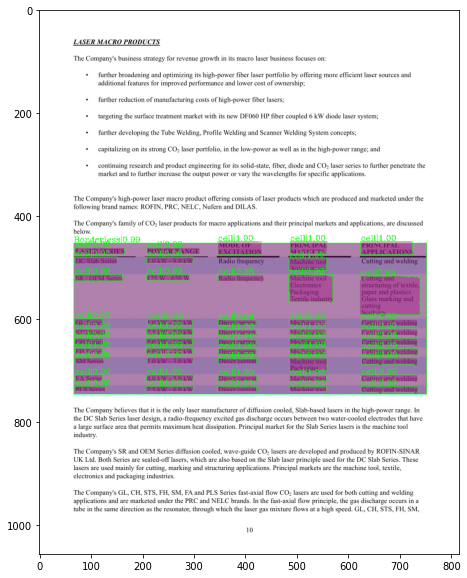

In [ ]:
#img_path_1="/content/test_img/test_img9.png"
img_path_1="/content/test_img/test_img14.jpg"
#img_path_1="/content/test_img16.png"
res=model_test(img_path_1,0.9,show_img=True)

In [ ]:
print(len(res))
res

2


[array([[3.46982086e+02, 7.30964233e+02, 4.21718994e+02, 7.40782959e+02,
         9.97293651e-01],
        [4.86183716e+02, 6.56830261e+02, 5.55828918e+02, 6.68310364e+02,
         9.96977806e-01],
        [4.85470795e+02, 7.30547119e+02, 5.56846802e+02, 7.40874939e+02,
         9.97058153e-01],
        [4.85551331e+02, 6.37833801e+02, 5.55565674e+02, 6.49832642e+02,
         9.94461596e-01],
        [6.95263290e+01, 7.30170227e+02, 1.28179520e+02, 7.40771851e+02,
         9.93887007e-01],
        [4.85883240e+02, 6.19788025e+02, 5.55221191e+02, 6.30929199e+02,
         9.96104956e-01],
        [3.48227020e+02, 6.57376282e+02, 4.20927063e+02, 6.68358215e+02,
         9.96079504e-01],
        [3.48157318e+02, 6.39257568e+02, 4.20590820e+02, 6.49988892e+02,
         9.95525897e-01],
        [6.94930878e+01, 6.19318420e+02, 1.28087112e+02, 6.30955627e+02,
         9.93526936e-01],
        [6.87836304e+01, 6.37568176e+02, 1.24053345e+02, 6.49814880e+02,
         9.92270708e-01],
        [2

In [ ]:
border=res[0][0]
borderless=res[2][0]

In [ ]:
border=res[0][0]
borderless=res[1][0]


724


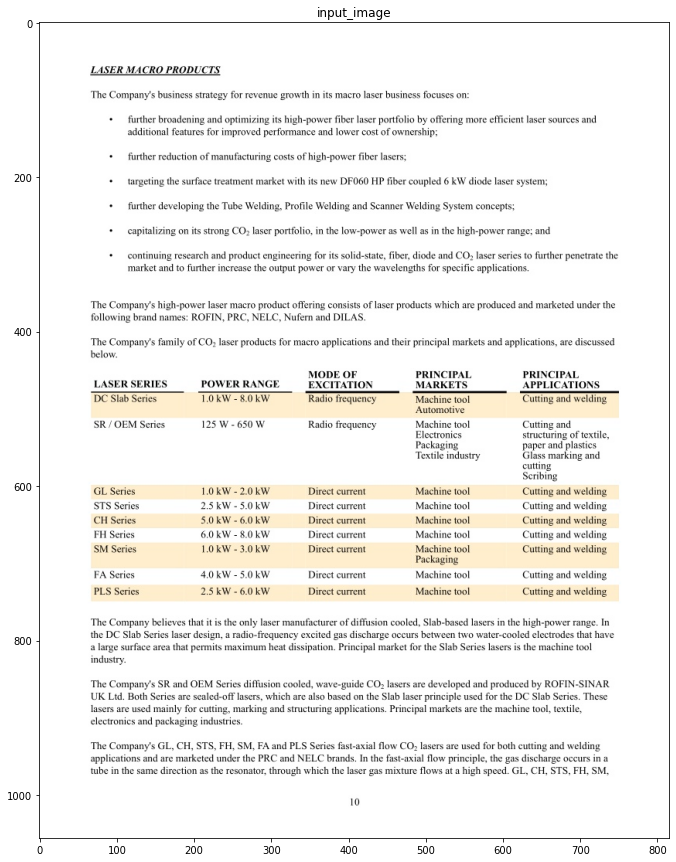

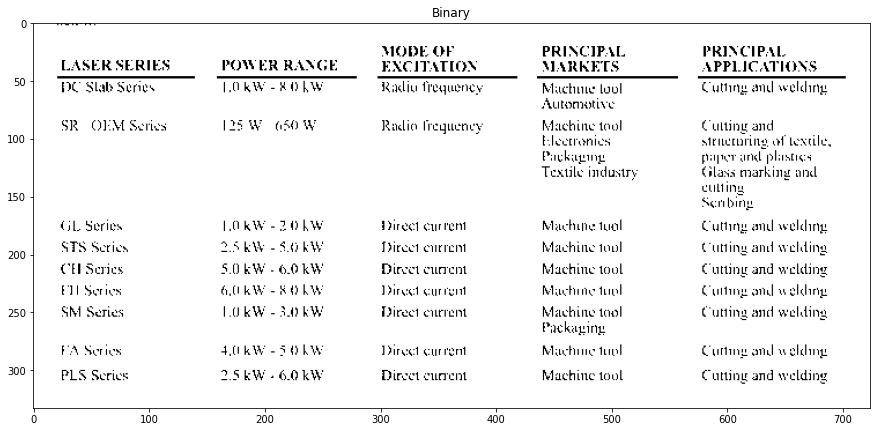

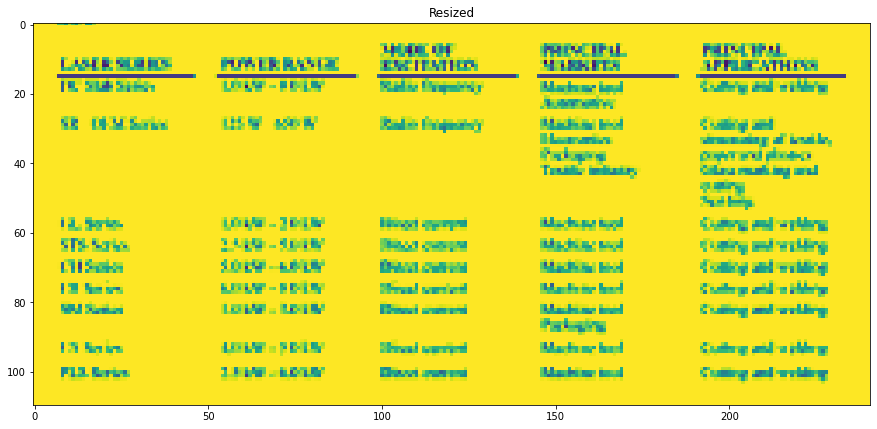

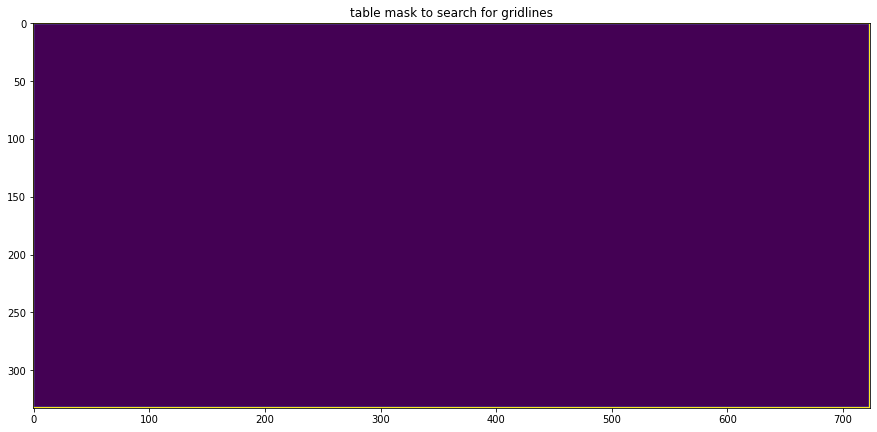

ROW:  11
COLUMNS:  6


In [ ]:
"""Cell recognition algorithm."""
from functools import total_ordering
import numpy as np
import cv2
from imutils import resize
import matplotlib.pyplot as plt
import pytesseract as pt
import pandas as pd

#TODO: Next may use argphase
#tab_select=border
tab_select=borderless
# demo document
dem = dict(
    img_path=img_path_1,
    #it_boxes=np.array([[ymin,  xmin, ymax, xmax]]),
    in_boxes=np.array([[int(tab_select[1])-20,  int(tab_select[0])-20, int(tab_select[3])+20, int(tab_select[2])+20]]))
    #in_boxes=np.array([[int(tab_select[1])+50,  int(tab_select[0])+50, int(tab_select[3])-20, int(tab_select[2])-300]]))
    #in_boxes=np.array([[int(tab_select[1]),  int(tab_select[0]), int(tab_select[3]), int(tab_select[2])]]))

#TODO: Expand size of bounding box for contour



dem_wdth = dem['in_boxes'][0][3] - dem['in_boxes'][0][1]
dem_hght = dem['in_boxes'][0][2] - dem['in_boxes'][0][0]
dem_xmin = dem['in_boxes'][0][1]
dem_ymin = dem['in_boxes'][0][0]

print(dem_wdth)
dem_image = cv2.imread(dem['img_path'])
plt.figure(figsize=(15,15))
plt.title("input_image")
plt.imshow(dem_image,cmap="gray")
plt.show()


# detected table from document
tbl_image = dem_image[dem_ymin: dem_ymin + dem_hght,
                      dem_xmin: dem_xmin + dem_wdth]

# threshold and resize table image
#TODO: adjust threshold for best binary image
## delete line
tbl_gray = cv2.cvtColor(tbl_image, cv2.COLOR_BGR2GRAY)
tbl_thresh_bin = cv2.threshold(tbl_gray, 115, 255, cv2.THRESH_BINARY)[1]
plt.figure(figsize=(15,15))
plt.title("Binary")
plt.imshow(tbl_thresh_bin,cmap="gray")
plt.show()


RAD = 3 #TODO: adjust r for radius make best row columns
tbl_resized = resize(tbl_thresh_bin, width=int(tbl_image.shape[1] // RAD))
plt.figure(figsize=(15,15))
plt.title("Resized")
plt.imshow(tbl_resized)
plt.show()

def get_dividers(img, axis):
    """Return array indicies of white horizontal or vertical lines."""
    blank_lines = np.where(np.all(img == 255, axis=axis))[0]
    filtered_idx = np.where(np.diff(blank_lines) != 1)[0]
    return blank_lines[filtered_idx]


dims = tbl_image.shape[0], tbl_image.shape[1]

# table mask to search for gridlines
tbl_str = np.zeros(dims, np.uint8)
tbl_str = cv2.rectangle(tbl_str, (0, 0), (dims[1] - 1, dims[0] - 1), 255, 1)
plt.figure(figsize=(15,15))
plt.title("table mask to search for gridlines")
plt.imshow(tbl_str)
plt.show()

for a in [0, 1]:
    dividers = get_dividers(tbl_resized, a)
    start_point = [0, 0]
    end_point = [dims[1], dims[1]]
    for i in dividers:
        i *= RAD
        start_point[a] = int(i)
        end_point[a] = int(i)
        cv2.line(tbl_str,
                 tuple(start_point),
                 tuple(end_point),
                 255,
                 1)


contours, hierarchy = cv2.findContours(tbl_str,
                                       cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE)


def sort_contours(cnts, method="left-to-right"):
    """Return sorted countours."""
    reverse = False
    k = 0
    if method in ['right-to-left', 'bottom-to-top']:
        reverse = True
    if method in ['top-to-bottom', 'bottom-to-top']:
        k = 1
    b_boxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, b_boxes) = zip(*sorted(zip(cnts, b_boxes),
                                  key=lambda b: b[1][k],
                                  reverse=reverse))
    return (cnts, b_boxes)


contours, boundingBoxes = sort_contours(contours, method='top-to-bottom')

# remove countours of the whole table
bb_filtered = [list(t) for t in boundingBoxes
               if t[2] < dims[1] and t[3] < dims[0]]

# allocate countours in table-like structure
rows = []
columns = []

for i, bb in enumerate(bb_filtered):
    if i == 0:
        columns.append(bb)
        previous = bb
    else:
        if bb[1] < previous[1] + previous[3]/2:
            columns.append(bb)
            previous = bb
            if i == len(bb_filtered) - 1:
                rows.append(columns)
        else:
            rows.append(columns)
            columns = []
            previous = bb
            columns.append(bb)

print("ROW: ",len(rows))
print("COLUMNS: ",len(columns ))

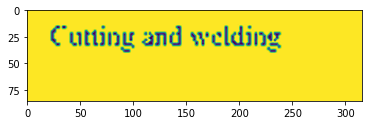

In [ ]:
outer = []
for r in rows:
    for c in r[::-1]:
        x, y, w, h = (c[0], c[1], c[2], c[3])
        finalimg = tbl_thresh_bin[y: y + h, x: x + w]
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
        border = cv2.copyMakeBorder(finalimg, 2, 2, 2, 2,
                                    cv2.BORDER_CONSTANT, value=[255, 255])
        resizing = cv2.resize(border, None, fx=2, fy=2,
                              interpolation=cv2.INTER_CUBIC)
        dilation = cv2.dilate(resizing, kernel, iterations=1)
        erosion = cv2.erode(dilation, kernel, iterations=1)
        plt.imshow(erosion)

        out = pt.image_to_string(erosion,lang='eng+tha')
        
        if len(out) == 0:
            out = pt.image_to_string(erosion, lang='eng+tha',config='--psm 3')

        filtered_out = ''.join([c if ord(c) < 128 else ''
                                for c in out]).strip()
        outer.append(filtered_out)

def make_df_image(df):
    with (tempfile.NamedTemporaryFile(mode='wb',
                                      suffix='.jpg',
                                      delete=False)) as df_path:
        dfi.export(df, df_path.name)
        df_img = mpimg.imread(df_path.name)
    return df_img


cells_flat = [c for r in rows for c in r[::-1]]

In [ ]:

dataframe = pd.DataFrame(np.array(outer)
                         .reshape(len(rows), len(columns)))
dataframe

0               1                2                    3  \
0                                                            
1       LASER SERIES      POWER RANGE  MODE OF\nEXCITATION   
2     DC Slab Series     LOKW - RO kW       Radi frequency   
3     SRO OEM Series            [2S W     Raclio Mregueney   
4          GL Series       LOKW -20hW        Dirge current   
5         STS Series    ZS KW - Sr KW       Direct current   
6          CE Series  S.A KW - 6.0 kW       Dirset current   
7         ETL Series      G0 kW - ROW       Dirvsd current   
8          SM Series    LO KW - 3. kW       Direet current   
9          PA Serigs     F0kW - SO RW       Dirgel current   
10        PLS Series     25   .601  9       Dirset current   

                                                    4  \
0                                                       
1                                  PRINCIPAL\nMARKETS   
2                             Machute   |\nAutomotive   
3   Machine tool\nBleetranies\nPackaging\nTextile ...   
4                                        Machine tual   
5                                        Machine tool   
6                                        Machine tool   
7                                         Maching tul   
8                             Machine tool\nPackazing   
9                                        Maching tupl   
10                                       Machine tool   

                                                    5  
0                                                      
1                             PRINCIPAL\nAPPLICATIONS  
2                                  Cuthag and welding  
3   Cutting and\nMernecoring of texcile,\nPaper an...  
4                                  Cuthag and welding  
5                                 Cutting and welding  
6                                 Cutting and welding  
7                                  Cuming and welding  
8                                  Curing and welding  
9                                  Curing and welding  
10                                Cutting and welding

In [ ]:
dataframe.to_csv("output_demo.csv")